# Analysis of Low Default Portfolio in Austrialian Credit Data.
This Notebook aims to tackle the `low default Portfolio problem in Credit scoring datasets`. Credit scoring in the means of computationally ascribing a number to a customer that depicts their creditworthiness (the confidence that the will repay a line of credit). Good customers get higher numbers while customers who default have lower mumbers, these numbers usually vary between 350 - 800. A good credit score can open various oppurtunities to loans, mortgages, and social oppurtunities, the reverse is the case for bad credit scores, as people with bad credit scores are subject to very high interest rates and limited social oppurtunities. It then becomes important to have a very good method for calculating credit scores, a method such as data science.
Using data science as a tool for determining credit scores encounters a common problem called class imbalance, in the credit scoring domain it is referred to as the low default portfolio problem. It's a phenomenon where in a data set the number of defaulters are miniscule when compared to the number of non-defaulters, therefore skewing the distribution of the dataset overwhemling in one direction. This poses a problem for data science tools because it makes interpreting results much more difficult as the data is already skewed to one side, and any algorithm used to fit such that will have a bias towards the non-defaulters.


In [13]:
#load the dataset
import pandas as pd
aus = pd.read_csv('Aussie Mach 2.csv')
aus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    int64  
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    int64  
 4   A5      690 non-null    int64  
 5   A6      690 non-null    int64  
 6   A7      690 non-null    float64
 7   A8      690 non-null    int64  
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    int64  
 14  A15     690 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 81.0 KB


# The Data set description
The data set is the credit data applications. It can be downloaded from the UCI Machine learning repository, it has 6 numerical and 8 catergorical attributes. It contains 690 instances, some preprocessing has been done in advance as all the column names have been anonymized and all have numerical values. There are 44.5% of non-defaulters and 55.5% of defaulters in the class or target attribute.
Further exploratory analysis of the data set is done below.



<AxesSubplot:>

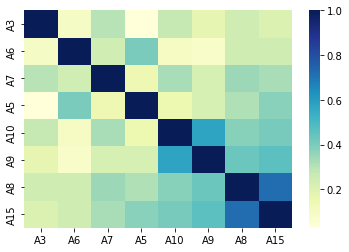

In [15]:
import pandas as pd
#pd.plotting.register_matplotlib_converters()#
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

corr_frame = aus.corr() #a dataframe of the correlations of each attribute with everyother attribute#
sorted_corrs = corr_frame['A15'].abs().sort_values()#a vector of absolute values of correlations with the class attribute A15#
strong_cores = sorted_corrs[sorted_corrs > 0.2]
corrmat = aus[strong_cores.index].corr()
sns.heatmap(corrmat,cmap='YlGnBu')

# Feature Selection
The above cell examines how the features correlate with the target attribute A15. An arbitary cut off correlation value of > 0.2 was selected to sort out strongly correlated features. Then these features were further examined to see if any correlate woth the other in order to remove features that duplicate data. It can be seen that A8 correlates with A15 than any others and A9 and A10 correlate with each other, which means we will take one of them out. In this case we will retain A10 and discard A9 as A10 is a continous feature. `Implement with Genetic Algorithm`

In [7]:
from sklearn import linear_model
from genetic_selection import GeneticSelectionCV
from sklearn.model_selection import train_test_split

y = aus.A15
strongly_corr_features = ['A3','A6','A7','A5','A10','A8']
X = aus[strongly_corr_features]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

aus_model_mach1 = linear_model.LogisticRegression()

selector_1 = GeneticSelectionCV(aus_model_mach1, cv=10,
                                  verbose = 1,
                                  scoring="accuracy",
                                  max_features=6,
                                  n_population=50,
                                  crossover_proba=0.5,
                                  mutation_proba=0.2,
                                  n_generations=40,
                                  crossover_independent_proba=0.5,
                                  mutation_independent_proba=0.05,
                                  tournament_size=3,
                                  n_gen_no_change=10,
                                  caching=True,
                                  n_jobs=-1)

chosen = selector_1.fit(train_X, train_y)
indexed = chosen.support_# the chosen attributes were A7, A5, A10,A8
print(indexed)
type(indexed)


Selecting features with genetic algorithm.
gen	nevals	avg                    	std                    	min                    	max                    
0  	50    	[0.77481674 3.54      ]	[0.09331936 1.82439031]	[0.60354449 1.        ]	[0.85297888 6.        ]
1  	27    	[0.84107089 4.68      ]	[0.03218425 1.31818056]	[0.71180241 1.        ]	[0.85297888 6.        ]
2  	26    	[0.85264178 4.82      ]	[0.00112123 1.10797112]	[0.84713424 3.        ]	[0.85486425 6.        ]
3  	32    	[0.85136802 4.6       ]	[0.01121106 0.91651514]	[0.7734917 2.       ]  	[0.85486425 6.        ]
4  	27    	[0.85341855 4.36      ]	[0.00155977 0.59194594]	[0.84720965 3.        ]	[0.85486425 5.        ]
5  	28    	[0.8544457 4.1      ]  	[0.00123188 0.3       ]	[0.84713424 4.        ]	[0.85486425 5.        ]
6  	26    	[0.85358296 3.96      ]	[0.00868809 0.19595918]	[0.79279789 3.        ]	[0.85486425 4.        ]
7  	27    	[0.85463122 3.94      ]	[0.00113018 0.23748684]	[0.84720965 3.        ]	[0.85486425 4.    

numpy.ndarray

# Model Analysis
This being a dissertation research, the algorithm or model to be used has already been decided before experimentation thus experimentation just serves to test performance in context of other algorithms or models. The problem statement of the research is to show that this model can handle imbalance, more pointedly can deal with identifying defaulters.

In [8]:
import imblearn
imblearn.__version__

'0.8.0'

# Ideal Run
To begin with, we will run all the algorithms to evaluated under ideal circumstances. That is, when the dataset is evenly distributed, to achieve this we will use SMOTE and UnderSampling to get the data to a 50:50 distribution. In Chawla's work he suggested that SMOTE be combined with some kind of undersampling method will improve model performance. The algorithms to be evaluated are: Zero R, Naive Bayes, SVM, MLP, LR, KNN, `proposed Ensemble (KNN, SVM, Decision Tree and Logistic Regression Meta)`, Decision Tree, Random Forest, Bayesian Networks, AdaBoost, Bagged Decision Tree. With the following metrics: Accuracy, AUCPRC, MCC,AUCROC and Time taken.

In [9]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

#Prepare Dataset
y = aus.A15
M = aus[['A7','A5','A10','A8']]
counter_1 = Counter(y)
print(counter_1)

#oversample with SMOTE and combine with undersampling..
oversample = SMOTE(sampling_strategy=0.9)
undersample = RandomUnderSampler(sampling_strategy=1)
config_size = [('o', oversample),('u',undersample)]
pipeline = Pipeline(steps=config_size)
M_ideal, y_ideal = pipeline.fit_resample(M, y)

counter_2 = Counter(y_ideal)
print(counter_2)


Counter({0: 383, 1: 307})
Counter({0: 344, 1: 344})


In [10]:
from multiprocessing import Pool
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import matthews_corrcoef 
from sklearn.metrics import make_scorer
scoring = {'Accuracy':'accuracy', 'AUCROC':'roc_auc',
          'AUCPRC': 'average_precision',
          'MCC':make_scorer(matthews_corrcoef)}

def prop_ensemble(tof, c, k_neigh,criteria, depth ):
    #Create Ensemble
    level_0 = list()
    level_0.append(('svm', SVC(kernel = tof, C = c)))
    level_0.append(('knn', KNeighborsClassifier(n_neighbors=k_neigh)))
    level_0.append(('cart', DecisionTreeClassifier(criterion =criteria, max_depth=depth)))
    #define meta learner model
    level_1 = LogisticRegression()
    #define the stacking ensemble
    modelled = StackingClassifier(estimators=level_0,
                                  final_estimator=level_1, cv=10)
    return modelled

 
# get a list of models to evaluate
def get_models(tof, c, k_neigh,criteria, depth):
    #get a list of models to evaluate
    mlmodels = dict()
    mlmodels['lr'] = LogisticRegression()
    mlmodels['knn'] = KNeighborsClassifier(n_neighbors=6)
    mlmodels['cart'] = DecisionTreeClassifier()
    mlmodels['svm'] = SVC()
    mlmodels['naive_bayes'] = GaussianNB()
    mlmodels['mlp'] = MLPClassifier()
    mlmodels['randomforest'] = RandomForestClassifier()
    mlmodels['adaboost'] = AdaBoostClassifier()
    mlmodels['bagging'] = BaggingClassifier()
    mlmodels['ensemble'] = prop_ensemble(tof, c, k_neigh,criteria, depth)
    return mlmodels
    

# evaluate a give model using cross-validation
def evaluate_model(algorithms, a, b):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    validate = cross_validate(algorithms, a, b, scoring=scoring,
                             cv=cv, n_jobs=-1, error_score='raise')
    return validate
 
# get the models to evaluate
models = get_models(tof = 'rbf', c = 1,
                    k_neigh = 9,criteria = 'gini', depth = 4 )
# evaluate the models and store results
results_1, names_1 = list(), list()
perform_1 = {}
for name_1, algorithm_1 in models.items():
    scored = evaluate_model(algorithm_1, M_ideal, y_ideal)
    results_1.append(scored)
    names_1.append(name_1)
    perform_1[name_1]  = scored


# Important Notes
The AUCPRC which calculates the Precision and Recall at each threshold using the trapezodial rule, can be gotten by using the `auc()` class. Alternatively, in theory calculating avergae precision should also preduce the same results or provide insight into the performance of algorithms. To check what metric names are available use `sorted(sklearn.metrics.SCORERS.keys())`. To find the keys within a multilevel dictionary `sorted(dict_name.keys()).

In [11]:
def record_keeping(performances):
    test_time_dict = {}
    acc_dict = {}
    aucroc_dict = {}
    auprc_dict = {}
    mcc_dict = {}

    for key, values in performances.items():
        test_time_dict[key] = values['fit_time'].mean()
        acc_dict[key] = (values['test_Accuracy'].mean())*100
        aucroc_dict[key] = values['test_AUCROC'].mean()
        auprc_dict[key] = values['test_AUCPRC'].mean()
        mcc_dict[key] = values['test_MCC'].mean()
        
    result_frame = pd.DataFrame({'Testing_Time':test_time_dict,
                                    'Accuracy':acc_dict,
                                    'AUCROC':aucroc_dict,
                                    'AUCPRC':auprc_dict,
                                    'MCC':mcc_dict})
    return result_frame

def analysis(learner, v, w):
    results, names = list(), list()
    dicty = {}
    for name, algorithm in learner.items():
        scores = evaluate_model(algorithm, v, w)
        results.append(scores)
        names.append(name)
        dicty[name]  = scores
        
    return dicty

complete_rec_1 = record_keeping(perform_1)

# Analysis
For the ideal run with feature selection, all the algorithms performed well, In terms of testing times, the MLP spent the longest whilst the Naive Bayes spent the least time. `Accuracy` is pertinent in this run, as both classes are evenly represented, the best three algorithms in this regard were `Logistic Regression`, `Naive Bayes` and `ANN`. Same with the `MCC` metric with `SVM` coming in third as opposed to ANN. The story is different for the `AUCROC` and `AUCPRC` metric were the best performing algorithms were `Logistic Regression`, `Proposed Ensemble` and `ANN`. Although difference in performance was minimal, it can be inferred that the best algorithm in this run was `Logistic Regression` accross all metrics.


In [12]:
complete_rec_1.index.names = ['algorithms']

# Imbalanced Run
In the real world Credit datasets are highly imbalanced and skewed with an over representation of non-defaulters, as such it is paramount that a model should at the very least retain discriminitive abilities as data becomes more and more skewed. The rest of the experiments have to do with assessing the performance of the afformentioned algorithms when the data is imbalanced 60/40, 70/30, 80/30, 90/10. To see which deals with imbalances the best. It is proposed that the developed ensemble will perform best over the imbalances. Realised that python packages do not allow for artificial imbalance. To fix soon.

In [13]:
#get dataset
aus_60 = pd.read_csv('Aussie_60.csv')
aus_60.rename(columns={"'Class Value'": 'A15'}, inplace=True)
y = aus_60.A15
X = aus_60[['A7','A5','A10','A8']]

# get the models to evaluate
models = get_models(tof = 'rbf', c = 1,
                    k_neigh = 9,criteria = 'gini', depth = 4 )
# evaluate the models and store results
perform_60 = analysis(models, X, y)

complete_rec_60 = record_keeping(perform_60)

complete_rec_60.index.names = ['algorithms']
complete_rec_60
complete_rec_60.sort_values(by=['MCC'], ascending=False)

Testing_Time   Accuracy    AUCROC    AUCPRC       MCC
algorithms                                                         
mlp               1.700119  88.017909  0.924332  0.943394  0.749849
lr                0.023833  87.599415  0.922062  0.940329  0.740451
randomforest      0.416864  87.424342  0.931100  0.942411  0.738621
ensemble          0.838565  87.426170  0.935347  0.950865  0.737594
naive_bayes       0.012652  87.251827  0.909902  0.926487  0.734376
svm               0.054634  87.216374  0.910774  0.923893  0.732571
adaboost          0.207286  86.867325  0.921727  0.934846  0.726727
bagging           0.051182  86.692251  0.920160  0.926649  0.724362
cart              0.008842  86.100877  0.866992  0.867932  0.713168
knn               0.009445  84.082968  0.904998  0.913132  0.671094

In [14]:
#get dataset
aus_70 = pd.read_csv('Aussie_70.csv')
aus_70.rename(columns={"'Class Value'": 'A15'}, inplace=True)
y = aus_70.A15
X = aus_70[['A7','A5','A10','A8']]

# get the models to evaluate
models = get_models(tof = 'rbf', c = 1,
                    k_neigh = 9,criteria = 'gini', depth = 4 )
# evaluate the models and store results

perform_70 = analysis(models, X, y)    
#keep results in a dataframe
complete_rec_70 = record_keeping(perform_70)


In [15]:
complete_rec_70.index.names = ['algorithms']
complete_rec_70
complete_rec_70.sort_values(by=['MCC'], ascending=False)

Testing_Time   Accuracy    AUCROC    AUCPRC       MCC
algorithms                                                         
randomforest      0.446935  90.307374  0.942300  0.964936  0.767726
bagging           0.063002  90.073204  0.932355  0.954384  0.762201
ensemble          1.239930  89.757423  0.944414  0.970588  0.752206
mlp               2.188569  88.949721  0.926829  0.961397  0.736543
cart              0.006935  88.820128  0.881837  0.915979  0.735890
lr                0.039478  88.976788  0.924094  0.959278  0.735551
naive_bayes       0.009515  88.872416  0.912331  0.951690  0.734868
adaboost          0.186100  88.741798  0.931824  0.961244  0.730676
svm               0.081934  88.637016  0.903678  0.939044  0.726683
knn               0.007793  87.721252  0.916682  0.943428  0.701883

In [16]:
#get dataset
aus_80 = pd.read_csv('Aussie_80.csv')
aus_80.rename(columns={"'Class Value'": 'A15'}, inplace=True)
y = aus_80.A15
X = aus_80[['A7','A5','A10','A8']]

# get the models to evaluate
models = get_models(tof = 'rbf', c = 1,
                    k_neigh = 9,criteria = 'gini', depth = 4 )
# evaluate the models and store results
perform_80 = analysis(models, X, y)
    
#keep results in a dataframe
complete_rec_80 = record_keeping(perform_80)

In [17]:
complete_rec_80.index.names = ['algorithms']
complete_rec_80
complete_rec_80.sort_values(by=['MCC'], ascending=False)

Testing_Time   Accuracy    AUCROC    AUCPRC       MCC
algorithms                                                         
randomforest      0.520944  93.195353  0.952801  0.982097  0.784573
bagging           0.071673  92.847495  0.940647  0.975099  0.775717
cart              0.011427  91.994619  0.890600  0.950599  0.751535
ensemble          1.947726  92.097604  0.949159  0.983215  0.744420
adaboost          0.222184  91.471695  0.932200  0.976501  0.726669
knn               0.011738  91.105476  0.914964  0.962773  0.711251
naive_bayes       0.010677  90.392125  0.913862  0.970675  0.707195
svm               0.134769  90.392216  0.893570  0.956667  0.706485
mlp               3.035008  90.096804  0.931165  0.977669  0.698625
lr                0.034373  89.783395  0.924294  0.974295  0.682806

In [18]:
#get dataset
aus_90 = pd.read_csv('Aussie_90.csv')
aus_90.rename(columns={"'Class Value'": 'A15'}, inplace=True)
y = aus_90.A15
X = aus_90[['A7','A5','A10','A8']]

# get the models to evaluate
models = get_models(tof = 'rbf', c = 1,
                    k_neigh = 9,criteria = 'gini', depth = 4 )
# evaluate the models and store results
perform_90 = analysis(models, X, y)
    
#keep results in a dataframe
complete_rec_90 = record_keeping(perform_90)

In [19]:
complete_rec_90.index.names = ['algorithms']
complete_rec_90
complete_rec_90 = complete_rec_90.rename(columns = {'Testing_Time':'Testing_Time_90',
                                    'Accuracy':'Accuracy_90',
                                    'AUCROC':'AUCROC_90',
                                    'AUCPRC':'AUCPRC_90',
                                    'MCC':'MCC_90'})

In [20]:
full_analysis = pd.merge(complete_rec_1, complete_rec_60, on='algorithms',
                suffixes=["_50", "_60"])
full_analysis = pd.merge(full_analysis, complete_rec_70, on='algorithms')
full_analysis = pd.merge(full_analysis, complete_rec_80, on='algorithms',
                suffixes=["_70","_80"])
full_analysis = pd.merge(full_analysis, complete_rec_90, on='algorithms')
# full_analysis

In [21]:
column_names = ['Testing_Time_50', 'Testing_Time_60',
           'Testing_Time_70', 'Testing_Time_80',
           'Testing_Time_90', 'Accuracy_50',
            'Accuracy_60', 'Accuracy_70',
           'Accuracy_80', 'Accuracy_90',
            'AUCROC_50',  'AUCROC_60',
            'AUCROC_70',  'AUCROC_80',
            'AUCROC_90', 'AUCPRC_50',
           'AUCPRC_60', 'AUCPRC_70',
            'AUCPRC_80', 'AUCPRC_90',
            'MCC_50', 'MCC_60',
          'MCC_70', 'MCC_80',
          'MCC_90']
df = full_analysis.reindex(columns=column_names)
df = df.T
df = df.rename_axis("Metrics")
df = df.rename_axis('Models', axis='columns')

df.columns = ['LR', 'KNN', 'Decision Tree',
           'SVM', 'Naive Bayes', 'MLP',
           'Random Forest', 'AdaBoost',
           'Bagged Decision Tree',
           'Proposed Ensemble']
aussie_table=df.copy()
aussie_table.index = pd.MultiIndex.from_product([['Testing_Time', 'Accuracy',
                                    'AUCROC','AUCPRC',
                                    'MCC'], 
                                    [50, 60, 70, 80, 90]],
                                    names=['metric', 'run'])

**The German Dataset seems to have some problems and since I cannot do a cost matrix for each algorithm yet. I will not use it in visualizations.**

# The Data set description
The data set is the German credit dataset. It can be downloaded from the UCI Machine learning repository, it contains 1000 instances. Originally it appears as a dataset with strings and intergers, but there is a numeric version alos abialble at the repository. Some preprocessing has been done in advance as all the column names have been anonymized and all have numerical values. There are 70% of non-defaulters and 30% of defaulters in the class or target attribute. Further exploratory analysis of the data set is done below. The dataset also  contains a cost amtrix for cost sensitive classification if needed.

In [22]:
#read the dataset
german_new_dt = pd.read_csv('SouthGermanCredit.asc',sep=' ',delimiter=None, index_col=False,skipinitialspace=True)

#rename the columns from german names to englsih name
german_new_dt.rename(columns={'laufkont':'status','laufzeit':'duration',
                              'moral':'credit_history','verw':'purpose',
                              'hoehe':'amount','sparkfont':'savings',
                              'beszeit':'employment_duration', 'rate':'installment_rate',
                              'famges':'personal_status_sex', 'buerge':'other_debtors',
                              'wohnzeit':'present_residence', 'verm':'property',
                              'weitkred':'other_installment_plans', 'sparkont':'savings',
                              'alter':'age', 'wohn':'housing','bishkred':'number_credits',
                              'beruf':'job', 'pers':'people_liable', 'telef':'telephone',
                              'gastarb':'foreign_worker','kredit':'class'
    
}, inplace=True)

In [23]:
german_dt = german_new_dt
german_dt.info()
german_dt['class'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

array([1, 0], dtype=int64)

<AxesSubplot:>

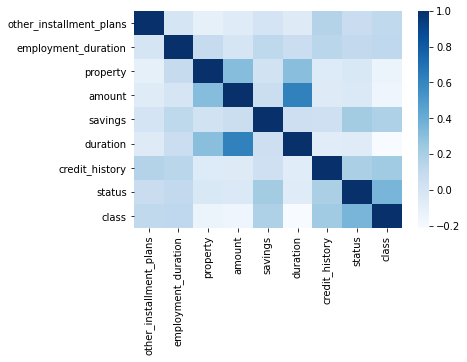

In [32]:
# a dataframe of the correlations of each attribute with everyother attribute
co_frame = german_dt.corr()

#a vector of absolute values of correlations with the class attribute 
sorted_co = co_frame['class'].abs().sort_values()
strong_co = sorted_co[sorted_co > 0.1]

# a plot of the highly correlated attributes
german_co = german_dt[strong_co.index].corr()
sns.heatmap(german_co,cmap='Blues')


In [33]:
here = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 
        'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap',
        'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens',
        'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges',
        'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1',
        'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu',
        'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r',
        'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu',
        'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r',
        'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral',
        'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 
        'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r',
        'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r',
        'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm',
        'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix',
        'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth',
        'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 
        'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern',
        'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r',
        'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r',
        'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r',
        'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r',
        'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket',
        'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r',
        'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r',
        'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted',
        'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'
]

Index(['savings', 'duration', 'status'], dtype='object')

In [38]:
#separate target column from other columns in the dataframe
y = german_dt['class']

#gather the features together and store as variable X
all_columns = strong_co.index
all_columns = all_columns[:-1]
X = german_dt[all_columns]

#split the features and target into train and test splits
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

german_model_mach1 = linear_model.LogisticRegression()

selector_1 = GeneticSelectionCV(german_model_mach1, cv=10,
                                  verbose = 1,
                                  scoring="accuracy",
                                  max_features=3,
                                  n_population=50,
                                  crossover_proba=0.5,
                                  mutation_proba=0.2,
                                  n_generations=40,
                                  crossover_independent_proba=0.5,
                                  mutation_independent_proba=0.05,
                                  tournament_size=3,
                                  n_gen_no_change=10,
                                  caching=True,
                                  n_jobs=-1)

chosen = selector_1.fit(train_X, train_y)
indexed = chosen.support_
print(indexed)
type(indexed)


Selecting features with genetic algorithm.
gen	nevals	avg                    	std                    	min                    	max                    
0  	50    	[0.70874667 2.12      ]	[0.01242838 0.81584312]	[0.68666667 1.        ]	[0.73733333 3.        ]
1  	32    	[-1199.36986667     2.46      ]	[3.24984805e+03 9.21086315e-01]	[-10000.      0.]      	[0.75066667 4.        ]
2  	28    	[0.72370667 2.62      ]        	[0.01306201 0.52497619]        	[0.688 1.   ]          	[0.75066667 3.        ]
3  	23    	[-999.33896    2.88   ]        	[3.00022035e+03 6.52380257e-01]	[-1.e+04  1.e+00]      	[0.75066667 5.        ]
4  	29    	[-999.33344    2.94   ]        	[3.00022219e+03 6.13514466e-01]	[-1.e+04  1.e+00]      	[0.75066667 5.        ]
5  	35    	[-1199.34357333     3.02      ]	[3.24985776e+03 5.47357287e-01]	[-1.e+04  2.e+00]      	[0.75066667 5.        ]
6  	32    	[-199.26536    2.98   ]        	[1.40010495e+03 2.44131112e-01]	[-1.e+04  2.e+00]      	[0.75066667 4.        ]
7  	2

numpy.ndarray

In [ ]:
try_out = strong_co.drop('class')
try_out[indexed].index

# Ideal Run for German Dataset
In this experiment as with the austrailian dataset, the data will be resampled using SMOTE and random undersampling techniques to resample the data such that the instances for defaulters are non-defaulters are equal. Then models will be trained on this dataset and this performance will serve as the basis or ideal situation performance. The algorithms run are the same from before.

In [40]:
german_dt.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'class'],
      dtype='object')

In [21]:
all_columns = all_columns[:-1]
all_columns

Index(['X2', 'X3'], dtype='object')

In [22]:
#Prepare Dataset
c = german_dt.Class
B = german_dt[all_columns]

counter_3 = Counter(c)
print(counter_3)

#oversample with SMOTE and combine with undersampling..
oversample_1 = SMOTE(sampling_strategy=0.9)
undersample_1 = RandomUnderSampler(sampling_strategy=1)
config_size = [('o', oversample_1),('u',undersample_1)]
pipeline_1 = Pipeline(steps=config_size)
B_ideal, c_ideal = pipeline_1.fit_resample(B, c)

counter_4 = Counter(c_ideal)
print(counter_4)
B_ideal

Counter({1: 700, 2: 300})
Counter({1: 630, 2: 630})


X2  X3
0     12   2
1     20   0
2     30   2
3     48   3
4     15   4
...   ..  ..
1255   6   1
1256  24   1
1257  36   2
1258  24   2
1259  12   2

[1260 rows x 2 columns]

In [23]:
cat_feature = B_ideal["X3"]
cat_features = cat_feature.values
cate_feature = cat_features.reshape(-1, 1)

In [24]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(cate_feature))
OH_cols_train.index = B_ideal.index
B_OH = B_ideal.drop('X3', axis=1)
B_ideals = pd.concat([B_OH, OH_cols_train], axis=1)
B_ideals

X2    0    1    2    3    4
0     12  0.0  0.0  1.0  0.0  0.0
1     20  1.0  0.0  0.0  0.0  0.0
2     30  0.0  0.0  1.0  0.0  0.0
3     48  0.0  0.0  0.0  1.0  0.0
4     15  0.0  0.0  0.0  0.0  1.0
...   ..  ...  ...  ...  ...  ...
1255   6  0.0  1.0  0.0  0.0  0.0
1256  24  0.0  1.0  0.0  0.0  0.0
1257  36  0.0  0.0  1.0  0.0  0.0
1258  24  0.0  0.0  1.0  0.0  0.0
1259  12  0.0  0.0  1.0  0.0  0.0

[1260 rows x 6 columns]

In [25]:
B_ideals.columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

std_feature = B_ideals["X1"]
std_features = std_feature.values
stde_feature = std_features.reshape(-1, 1)

num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('std_scaler', StandardScaler()),
])
B_idea = pd.DataFrame(num_pipeline.fit_transform(stde_feature))

In [27]:
B_idea.index = B_ideals.index
B_ST = B_ideals.drop('X1', axis=1)
B_ideals = pd.concat([B_ST, B_idea], axis=1)
B_ideals

X2   X3   X4   X5   X6         0
0     0.0  0.0  1.0  0.0  0.0 -0.833525
1     1.0  0.0  0.0  0.0  0.0 -0.194011
2     0.0  0.0  1.0  0.0  0.0  0.605381
3     0.0  0.0  0.0  1.0  0.0  2.044288
4     0.0  0.0  0.0  0.0  1.0 -0.593708
...   ...  ...  ...  ...  ...       ...
1255  0.0  1.0  0.0  0.0  0.0 -1.313161
1256  0.0  1.0  0.0  0.0  0.0  0.125746
1257  0.0  0.0  1.0  0.0  0.0  1.085017
1258  0.0  0.0  1.0  0.0  0.0  0.125746
1259  0.0  0.0  1.0  0.0  0.0 -0.833525

[1260 rows x 6 columns]

In [28]:
# get the models to evaluate
models_1 = get_models(tof = 'rbf', c = 1,
                    k_neigh = 10,criteria = 'entropy', depth = 2 )

# evaluate the models and store results
perform_german_1 = analysis(models_1, B_ideals, c_ideal)
    
#keep results in a dataframe
german_rec_ideal = record_keeping(perform_german_1)
german_rec_ideal.index.names = ['algorithms']
german_rec_ideal


Testing_Time   Accuracy    AUCROC    AUCPRC       MCC
algorithms                                                         
lr                0.025554  62.619048  0.686050  0.404937  0.254423
knn               0.009090  60.555556  0.658802  0.426638  0.228826
cart              0.005545  62.751323  0.686932  0.405563  0.257123
svm               0.079949  62.883598  0.679130  0.411185  0.259330
naive_bayes       0.005736  58.915344  0.678063  0.406903  0.221564
mlp               2.818671  63.121693  0.683518  0.414467  0.264201
randomforest      0.596741  62.936508  0.685492  0.407345  0.261411
adaboost          0.295797  62.724868  0.692962  0.406104  0.255512
bagging           0.072163  62.857143  0.683783  0.406293  0.261072
ensemble          0.988518  62.645503  0.680894  0.412403  0.254146

# Ideal Analysis
In the ideal run for the german dataset, the dataset contained 630 values for defaulters and non defaulters. The results displayed in the table about are excellent but also counter intuitive. Most of the algorithms achieved an accuracy of 100% but vary in performance in Area under the Precision Recall Curve, where the max is 1 and minimum is zero. This suggests that something or some other arrangement within the data was learnt by the algorithms and this affected their performance. This will be further investigated in subsequent distributions of the dataset.

In [24]:
#Prepare Dataset for 60/40
german_60 = pd.read_csv('German Numeric 60.csv')
c_60 = german_60.Class

B_60 = german_60[all_columns]

# get the models to evaluate
models_1 = get_models(tof = 'rbf', c = 1,
                    k_neigh = 10,criteria = 'entropy', depth = 2 )

# evaluate the models and store results
perform_german_60 = analysis(models_1, B_60, c_60)
    
#keep results in a dataframe
german_rec_60 = record_keeping(perform_german_60)
german_rec_60.index.names = ['algorithms']
german_rec_60

Testing_Time   Accuracy    AUCROC    AUCPRC       MCC
algorithms                                                         
lr                0.009613  65.232832  0.684956  0.508227  0.236003
knn               0.003467  66.036693  0.681875  0.518705  0.260763
cart              0.003000  70.090137  0.717562  0.476411  0.359771
svm               0.042818  62.180715  0.655311  0.519639  0.153221
naive_bayes       0.004156  64.720012  0.682131  0.509854  0.222988
mlp               0.612007  64.404902  0.689374  0.507098  0.228278
randomforest      0.315664  70.574958  0.732363  0.471307  0.370232
adaboost          0.156433  70.434227  0.754242  0.469752  0.367790
bagging           0.032955  70.003438  0.726061  0.473537  0.357579
ensemble          0.504293  66.947637  0.712741  0.490180  0.287403

In [25]:
# get the models to evaluate
models_1 = get_models(tof = 'rbf', c = 1,
                    k_neigh = 10,criteria = 'entropy', depth = 2 )

# evaluate the models and store results
perform_german_70 = analysis(models_1, B, c)
    
#keep results in a dataframe
german_rec_70 = record_keeping(perform_german_70)
german_rec_70.index.names = ['algorithms']

In [26]:
#Prepare Dataset for 80/20
german_80 = pd.read_csv('German Numeric 80.csv')
c_80 = german_80.Class

B_80 = german_80[all_columns]

# get the models to evaluate
models_1 = get_models(tof = 'rbf', c = 1,
                    k_neigh = 10,criteria = 'entropy', depth = 2 )

# evaluate the models and store results
perform_german_80 = analysis(models_1, B_80, c_80)
    
#keep results in a dataframe
german_rec_80 = record_keeping(perform_german_80)
german_rec_80.index.names = ['algorithms']

In [27]:
#Prepare Dataset for 90/10
german_90 = pd.read_csv('German Numeric 90.csv')
c_90 = german_90.Class

B_90 = german_90[all_columns]

# get the models to evaluate
models_1 = get_models(tof = 'rbf', c = 1,
                    k_neigh = 10,criteria = 'entropy', depth = 2 )

# evaluate the models and store results
perform_german_90 = analysis(models_1, B_90, c_90)
    
#keep results in a dataframe
german_rec_90 = record_keeping(perform_german_90)
german_rec_90.index.names = ['algorithms']
german_rec_90
german_rec_90 = german_rec_90.rename(columns = {'Testing_Time':'Testing_Time_90',
                                    'Accuracy':'Accuracy_90',
                                    'AUCROC':'AUCROC_90',
                                    'AUCPRC':'AUCPRC_90',
                                    'MCC':'MCC_90'})
german_rec_90

Testing_Time_90  Accuracy_90  AUCROC_90  AUCPRC_90    MCC_90
algorithms                                                                
lr                   0.016936    90.033333   0.699936   0.835157  0.094284
knn                  0.006500    89.144444   0.785263   0.849818  0.130314
cart                 0.005900    89.311111   0.845718   0.834729  0.189921
svm                  0.120341    90.000000   0.497895   0.885927  0.000000
naive_bayes          0.003567    88.944444   0.706311   0.834336  0.148803
mlp                  1.387405    89.900000   0.696772   0.835555  0.018030
randomforest         0.423898    89.566667   0.857833   0.817810  0.233667
adaboost             0.191314    90.044444   0.861879   0.797772  0.124158
bagging              0.050970    89.433333   0.852490   0.826876  0.232387
ensemble             1.306982    89.900000   0.815656   0.808373  0.081446

In [28]:
german_analysis = pd.merge(german_rec_ideal, german_rec_60, on='algorithms',
                suffixes=["_50", "_60"])
german_analysis = pd.merge(german_analysis, german_rec_70, on='algorithms')
german_analysis = pd.merge(german_analysis, german_rec_80, on='algorithms',
                suffixes=["_70","_80"])
german_analysis = pd.merge(german_analysis, german_rec_90, on='algorithms')

column_names = ['Testing_Time_50', 'Testing_Time_60',
           'Testing_Time_70', 'Testing_Time_80',
           'Testing_Time_90', 'Accuracy_50',
            'Accuracy_60', 'Accuracy_70',
           'Accuracy_80', 'Accuracy_90',
            'AUCROC_50',  'AUCROC_60',
            'AUCROC_70',  'AUCROC_80',
            'AUCROC_90', 'AUCPRC_50',
           'AUCPRC_60', 'AUCPRC_70',
            'AUCPRC_80', 'AUCPRC_90',
            'MCC_50', 'MCC_60',
          'MCC_70', 'MCC_80',
          'MCC_90']
df_2 = german_analysis.reindex(columns=column_names)
df_2 = df_2.T
df_2 = df_2.rename_axis("Metrics")
df_2 = df_2.rename_axis('Models', axis='columns')

df_2.columns = ['LR', 'KNN', 'Decision Tree',
           'SVM', 'Naive Bayes', 'MLP',
           'Random Forest', 'AdaBoost',
           'Bagged Decision Tree',
           'Proposed Ensemble']

german_table=df_2.copy()
german_table.index = pd.MultiIndex.from_product([['Testing_Time', 'Accuracy',
                                    'AUCROC','AUCPRC',
                                    'MCC'], 
                                    [50, 60, 70, 80, 90]],
                                    names=['metric', 'run'])
german_table

LR        KNN  Decision Tree        SVM  Naive Bayes  \
metric       run                                                                
Testing_Time 50    0.011434   0.003667       0.003601   0.044836     0.003067   
             60    0.009613   0.003467       0.003000   0.042818     0.004156   
             70    0.012043   0.003657       0.002469   0.036015     0.004125   
             80    0.012034   0.003667       0.003467   0.055970     0.003700   
             90    0.016936   0.006500       0.005900   0.120341     0.003567   
Accuracy     50   64.947090  61.878307      64.259259  62.751323    63.280423   
             60   65.232832  66.036693      70.090137  62.180715    64.720012   
             70   71.500000  67.133333      68.866667  70.200000    70.700000   
             80   79.888889  79.022222      78.911111  80.000000    79.666667   
             90   90.033333  89.144444      89.311111  90.000000    88.944444   
AUCROC       50    0.696175   0.654586       0.700722   0.682796     0.694402   
             60    0.684956   0.681875       0.717562   0.655311     0.682131   
             70    0.683397   0.614254       0.632040   0.643317     0.684984   
             80    0.693926   0.686375       0.739458   0.592491     0.697657   
             90    0.699936   0.785263       0.845718   0.497895     0.706311   
AUCPRC       50    0.402161   0.428220       0.399915   0.408298     0.404811   
             60    0.508227   0.518705       0.476411   0.519639     0.509854   
             70    0.609014   0.656924       0.636384   0.625024     0.608345   
             80    0.710032   0.737655       0.713571   0.745290     0.709652   
             90    0.835157   0.849818       0.834729   0.885927     0.834336   
MCC          50    0.300088   0.240515       0.287119   0.256975     0.269833   
             60    0.236003   0.260763       0.359771   0.153221     0.222988   
             70    0.194953   0.082433       0.119018   0.116253     0.179344   
             80    0.123845   0.121806       0.144181   0.000000     0.181599   
             90    0.094284   0.130314       0.189921   0.000000     0.148803   

                        MLP  Random Forest   AdaBoost  Bagged Decision Tree  \
metric       run                                                              
Testing_Time 50    0.843754       0.297860   0.148712              0.038334   
             60    0.612007       0.315664   0.156433              0.032955   
             70    0.581282       0.384651   0.205749              0.037770   
             80    0.710321       0.410798   0.168612              0.043788   
             90    1.387405       0.423898   0.191314              0.050970   
Accuracy     50   63.888889      64.206349  63.968254             64.074074   
             60   64.404902      70.574958  70.434227             70.003438   
             70   71.633333      69.366667  71.233333             69.233333   
             80   79.933333      79.244444  80.266667             79.155556   
             90   89.900000      89.566667  90.044444             89.433333   
AUCROC       50    0.698602       0.698652   0.708764              0.697606   
             60    0.689374       0.732363   0.754242              0.726061   
             70    0.685571       0.637302   0.688802              0.636183   
             80    0.693861       0.748282   0.774921              0.739194   
             90    0.696772       0.857833   0.861879              0.852490   
AUCPRC       50    0.402790       0.401616   0.401706              0.401876   
             60    0.507098       0.471307   0.469752              0.473537   
             70    0.608329       0.637709   0.609767              0.638866   
             80    0.708929       0.700982   0.688111              0.708530   
             90    0.835555       0.817810   0.797772              0.826876   
MCC          50    0.280693       0.287098   0.282380              0.286584   
             60    0

In [29]:
final_df = pd.merge(df, df_2, on='Metrics')
final_df.index = pd.MultiIndex.from_product([['Testing_Time', 'Accuracy',
                                    'AUCROC','AUCPRC',
                                    'MCC'], 
                                    [50, 60, 70, 80, 90]],
                                    names=['metric', 'run'])

final_df

LR_x      KNN_x  Decision Tree_x      SVM_x  \
metric       run                                                     
Testing_Time 50    0.014702   0.003967         0.004201   0.010767   
             60    0.014711   0.005801         0.003667   0.024569   
             70    0.013134   0.004533         0.004034   0.045837   
             80    0.015633   0.005567         0.005233   0.079072   
             90    0.021915   0.008590         0.007500   0.159118   
Accuracy     50   86.277352  81.587099        80.560529  85.210997   
             60   87.599415  84.082968        86.309211  87.216374   
             70   88.976788  87.721252        88.714321  88.637016   
             80   89.783395  91.105476        92.116329  90.392216   
             90   90.415203  95.446780        96.186987  92.965930   
AUCROC       50    0.912817   0.874486         0.815846   0.905881   
             60    0.922062   0.904998         0.869030   0.910774   
             70    0.924094   0.916682         0.880095   0.903678   
             80    0.924294   0.914964         0.892729   0.893570   
             90    0.922955   0.921942         0.904013   0.831236   
AUCPRC       50    0.910748   0.855522         0.771629   0.903514   
             60    0.940329   0.913132         0.869727   0.923893   
             70    0.959278   0.943428         0.914751   0.939044   
             80    0.974295   0.962773         0.951541   0.956667   
             90    0.987673   0.983572         0.979490   0.961498   
MCC          50    0.729591   0.637456         0.613734   0.706590   
             60    0.740451   0.671094         0.717330   0.732571   
             70    0.735551   0.701883         0.733223   0.726683   
             80    0.682806   0.711251         0.755454   0.706485   
             90    0.488405   0.731192         0.786649   0.521325   

                  Naive Bayes_x      MLP_x  Random Forest_x  AdaBoost_x  \
metric       run                                                          
Testing_Time 50        0.002967   1.026996         0.310644    0.129935   
             60        0.003200   1.427157         0.322857    0.147411   
             70        0.003267   2.057113         0.328691    0.153778   
             80        0.003334   2.833105         0.342097    0.158051   
             90        0.004734   6.507044         0.439832    0.233583   
Accuracy     50       85.601733  86.037226        84.292413   85.120063   
             60       87.251827  87.913743        87.528143   86.867325   
             70       88.872416  89.002420        90.464649   88.741798   
             80       90.392125  90.131708        93.230257   91.471695   
             90       91.912407  94.959696        96.779034   95.403242   
AUCROC       50        0.904454   0.912431         0.891704    0.905529   
             60        0.909902   0.923223         0.933210    0.921727   
             70        0.912331   0.926577         0.943073    0.931824   
             80        0.913862   0.931888         0.953827    0.932200   
             90        0.913949   0.937886         0.961345    0.937355   
AUCPRC       50        0.893326   0.912102         0.881913    0.900651   
             60        0.926487   0.941639         0.945419    0.934846   
             70        0.951690   0.961669         0.965820    0.961244   
             80        0.970675   0.977666         0.982676    0.976501   
             90        0.986461   0.989866         0.992438    0.989576   
MCC          50        0.714595   0.724285         0.688354    0.705387   
             60        0.734376   0.747586         0.740755    0.726727   
             70        0.734868   0.738371         0.771436    0.730676   
             80        0.707195   0.700272         0.785582    0.726669   
             90        0.626250   0.684441         0.815834    0.726360   

                  Bagged Decision Tree_x  Proposed Ensemble_x       LR_y  \
metric       run              

# Notes
The next step is to create visualizations from the data collected from the results and show the performances of the different algorithms across both datasets and show which algorithm(s) performed best and try to determine why. For the above dataframe, it can be noticed that the aussie part of the data which is X suffixed looks as we would expect, but the german part of the data has inconsistent results in terms of performance of the algorithms. This suggests that there may be something wrong with the dataset set such that the algorithms are learning the wrong function. Visualization might confirm this suspicion or the dataset can be switched to the other german dataset.

In [32]:
aussie_table.to_csv('aussie_results.csv', index=False)
german_table.to_csv('german_results.csv', index=False)
final_df.to_csv('final_results.csv', index=False)